In [1]:
import landscapes
import sklearn.manifold
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
DEEP_CUTOFF = 0.05
SHALLOW_CUTOFF = 0.005

In [3]:
plt.style.use('default')

MARKER_SIZE = 10
LINE_WIDTH = 0.1

DEPTH_PALETTE={'Shallow': '#e9a3c9', 'Neither': '#c2c2c2', 'Deep': '#a1d76a'}

CLUSTER_PALETTE={'Other': '#D7D9D7',
                 '3KZK': '#F06AA7',
                 '1J85': '#340068',
                 '1FUG': '#B287A3',
                 '6QQW': '#FFC100',
                 '1UAK': '#F67A28',
                 '2V3J': '#5CB42D',
                 '3ZNC': '#E01300',
                 '6RQQ': '#00AFF5',
                 '4QEF': '#6B8EC7'}

DIAGRAM_COLOUR = '#6baed6'

plt.rcParams['figure.figsize'] = (2.5,2.5)


plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['font.size'] = 10
plt.rcParams['legend.title_fontsize'] = 9

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

In [4]:
def load_landscape(chain):
    return landscapes.load("./data/landscapes/interpolated_x6/{}_1.lan".format(chain))

def load_diagram(chain):
    return np.loadtxt("./data/diagrams/interpolated_x6/{}_1.txt".format(chain))

In [5]:
# Every trefoil protein considered in Sections 2 and 3
trefoil_df = pd.read_csv('trefoil_list.csv')

# We just relabel representatives here, so e.g. 4qef_A becomes 4QEF in the representative column
# This is for aesthetic reasons, and also because the underscore would cause problems with TeX rendering
trefoil_df.Representative = list(map(lambda x: x if x == 'Other' else x[:4].upper(), trefoil_df.Representative))

# Add depth categories according to the cutoffs
def depth_category(row):
    depth = row['Depth']
    if depth > DEEP_CUTOFF:
        return 'Deep'
    if depth < SHALLOW_CUTOFF:
        return 'Shallow'
    return 'Neither'

trefoil_df['Depth category'] = trefoil_df.apply(depth_category, axis=1)

trefoil_df

,Chain,Depth,Length,N-tail,C-tail,Representative,Depth category
0,6i0j_A,0.001136,257,25,3,4QEF,Shallow
1,6i0w_A,0.001382,258,23,4,4QEF,Shallow
2,6hr3_A,0.001037,258,23,3,4QEF,Shallow
3,6nj4_A,0.004579,266,27,12,4QEF,Shallow
4,6nj5_A,0.003816,266,27,10,4QEF,Shallow
...,...,...,...,...,...,...,...
508,2o3a_A,0.132525,167,77,48,Other,Deep
509,2qwv_A,0.089893,202,131,28,Other,Deep
510,3o7b_A,0.083333,216,144,27,Other,Deep
511,1o6d_A,0.096117,147,67,31,Other,Deep


# Section 2

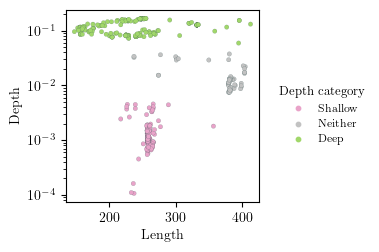

In [39]:
ax = sns.scatterplot(data=trefoil_df, x="Length", y="Depth",
                     hue="Depth category", palette=DEPTH_PALETTE,
                     edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)
ax.set_yscale("log")

legend = ax.legend(bbox_to_anchor=(1.05, 0.65), title='Depth category', prop={'size': 8}, frameon=False)

for i in range(3):
    legend.legendHandles[i]._sizes = [MARKER_SIZE]
    
plt.savefig("./data/lengthvdepth-depth.pdf", bbox_inches="tight", transparent=True)

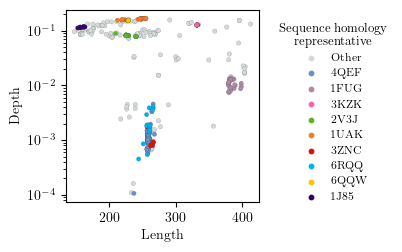

In [7]:
ax = sns.scatterplot(data=trefoil_df[trefoil_df.Representative == "Other"],
                     x="Length", y="Depth",
                     hue="Representative", palette=CLUSTER_PALETTE,
                     edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)

sns.scatterplot(ax =ax, data=trefoil_df[trefoil_df.Representative != "Other"],
                x="Length", y="Depth",
                hue="Representative", palette=CLUSTER_PALETTE,
                edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)

ax.set_yscale("log")

legend = ax.legend(bbox_to_anchor=(1.05, 0.98), title='Sequence homology \n representative',
                   loc='upper left', prop={'size': 8}, frameon=False)

plt.setp(legend.get_title(), multialignment='center')



for i in range(10):
    legend.legendHandles[i]._sizes = [MARKER_SIZE]
    
plt.savefig("figures/lengthvdepth-cluster.pdf", bbox_inches="tight", transparent=True)

In [8]:
def plot_diagram(barcode, lower=0, upper=10, ax=None):
    births, deaths = np.array([(b,d) for (b,d) in barcode if d - b > 0.2]).T
    
    if ax is not None:
        sns.lineplot(ax=ax, x=[0,upper+1], y=[0,upper+1], style=True, dashes=[(2,2)], color='black')
    else:
        ax = sns.lineplot(x=[0,upper+1], y=[0,upper+1], style=True, dashes=[(2,2)], color='black')
    sns.scatterplot(ax=ax, x=births, y=deaths,color=DIAGRAM_COLOUR,
                    edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)
    ax.set_xlim([lower,upper])
    ax.set_ylim([lower,upper])
    ax.get_legend().remove()

    return ax

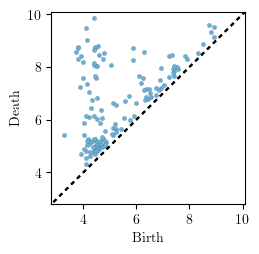

In [9]:
barcode = load_diagram("3kzk_A")

ax = plot_diagram(barcode, lower=2.8, upper=10.1)

ax.set_ylabel("Death")
ax.set_xlabel("Birth")

plt.savefig("figures/diagram-3kzk.pdf",bbox_inches="tight", transparent=True)

barcode = load_diagram("4qef_A")

ax = plot_diagram(barcode, lower=2.8, upper=10.1)

ax.set_ylabel("Death")
ax.set_xlabel("Birth")

plt.savefig("figures/diagram-4qef.pdf",bbox_inches="tight", transparent=True)

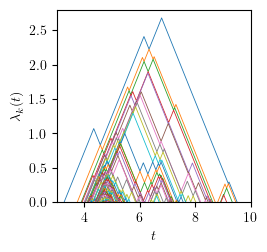

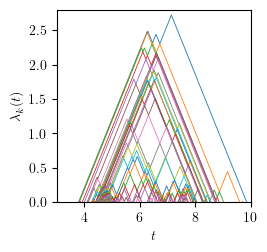

In [41]:
def plot_landscape(landscape, xlim=None, ylim=None, colors=None, linewidths=None, labels=None):
    fig, ax = landscape.plot(linewidths=linewidths, colors=colors, labels=labels)
    
    ax.set_xlabel("$t$")
    ax.set_ylabel("$\lambda_k(t)$")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return fig, ax

xlim = [3,10]
ylim = [0,2.8]

landscape_4qef = load_landscape("4qef_A")

fig, ax = plot_landscape(landscape_4qef, xlim, ylim, linewidths=[0.6]*landscape_4qef.max_k())
fig.savefig("figures/landscape-4qef.pdf",bbox_inches="tight", transparent=True)
fig.savefig("figures/landscape-4qef.png", dpi=300, bbox_inches="tight", transparent=True)



landscape_3kzk = load_landscape("3kzk_A")

fig, ax = plot_landscape(landscape_3kzk, xlim, ylim, linewidths=[0.6]*landscape_3kzk.max_k())
fig.savefig("figures/landscape-3kzk.pdf",bbox_inches="tight", transparent=True)
fig.savefig("figures/landscape-3kzk.png", dpi=300, bbox_inches="tight", transparent=True)

# Section 3

In [11]:
def isomap(distance_matrix):
    model = sklearn.manifold.Isomap(metric="precomputed", n_components=2)
    embedding = model.fit_transform(distance_matrix)
    return embedding

def add_embedding_to_df(dataframe, embedding, name):
    x, y = embedding.T
    dataframe["{} x".format(name)] = x
    dataframe["{} y".format(name)] = y
    
wass_dm = np.loadtxt('./data/wass_dm.txt')
add_embedding_to_df(trefoil_df, isomap(wass_dm), "wass isomap")

landscape_dm = np.loadtxt('./data/landscape_dm.txt')
add_embedding_to_df(trefoil_df, isomap(landscape_dm), "landscape isomap")

In [33]:
def set_isomap(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set(xlabel=None, ylabel=None)
    ax.legend(prop={'size': 8})
    ax.axis('off')

def generate_isomap_figs(name, show_legends=True, title=None):
    
    x = "{} isomap x".format(name)
    y = "{} isomap y".format(name)

    ax = sns.scatterplot(data=trefoil_df[trefoil_df['Depth category'] == 'Neither'],
                         x=x, y=y,
                         hue='Depth category', palette=DEPTH_PALETTE,
                         edgecolor='DarkSlateGray', s=MARKER_SIZE, linewidth=LINE_WIDTH)

    sns.scatterplot(ax=ax, data=trefoil_df[trefoil_df['Depth category'] != 'Neither'],
                    x=x, y=y,
                    hue='Depth category', palette=DEPTH_PALETTE,
                    edgecolor='DarkSlateGray', s=MARKER_SIZE, linewidth=LINE_WIDTH)
    set_isomap(ax)

    if show_legends:
        legend = ax.legend(bbox_to_anchor=(1.51, 0.75), title='Depth category', prop={'size': 8}, frameon=False)

        for i in range(3):
            legend.legendHandles[i]._sizes = [MARKER_SIZE]
    else:
        ax.get_legend().remove()

    plt.savefig('figures/isomap-{}-depth.svg'.format(name), bbox_inches='tight', transparent=True)
    plt.savefig('figures/isomap-{}-depth.png'.format(name), dpi=300, bbox_inches='tight', transparent=True)


    plt.show()

    ax = sns.scatterplot(data=trefoil_df[trefoil_df.Representative == "Other"],
                         x=x, y=y,
                         hue="Representative", palette=CLUSTER_PALETTE,
                         edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)

    sns.scatterplot(ax = ax, data=trefoil_df[trefoil_df.Representative != "Other"],
                    x=x, y=y,
                    hue="Representative", palette=CLUSTER_PALETTE,
                    edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)


    set_isomap(ax)

    if show_legends:
        legend = ax.legend(bbox_to_anchor=(0.9, 1.03), title='Sequence homology \n representative',
                   loc='upper left', prop={'size': 8}, frameon=False)

        plt.setp(legend.get_title(), multialignment='center')


        for i in range(10):
            legend.legendHandles[i]._sizes = [MARKER_SIZE]
    else:
        ax.get_legend().remove()

    if title is not None:
        ax.set_title(title)
        
    plt.savefig("figures/isomap-{}-cluster.svg".format(name), bbox_inches="tight", transparent=True)
    plt.savefig('figures/isomap-{}-depth.png'.format(name), dpi=300, bbox_inches='tight', transparent=True)

    plt.show()

    if show_legends:
        plt.rcParams["figure.figsize"] = (3.125,2.5)

    ax = sns.scatterplot(data=trefoil_df,
                         x=x, y=y,
                         hue="Length", palette="crest",
                         edgecolor="DarkSlateGray", s=MARKER_SIZE, linewidth=LINE_WIDTH)

    set_isomap(ax)
    ax.get_legend().remove()

    if show_legends:
        norm = plt.Normalize(trefoil_df.Length.min(), trefoil_df.Length.max())
        sm = plt.cm.ScalarMappable(cmap="crest", norm=norm)
        sm.set_array([])

        clb = plt.colorbar(sm, shrink=0.75)
        clb.set_label('Length', labelpad=20, rotation='horizontal', size=10)
        clb.ax.tick_params(labelsize=8, ) 

    plt.savefig("figures/isomap-{}-length.svg".format(name), bbox_inches="tight", transparent=True)
    plt.savefig("figures/isomap-{}-length.png".format(name), dpi=300, bbox_inches="tight", transparent=True)


    plt.rcParams["figure.figsize"] = (2.5,2.5)

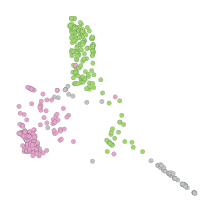

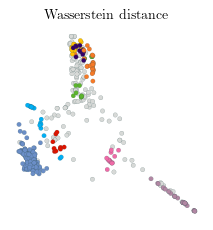

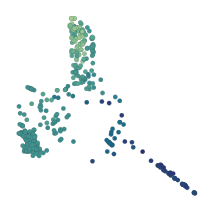

In [34]:
generate_isomap_figs("wass", show_legends=False, title="Wasserstein distance")

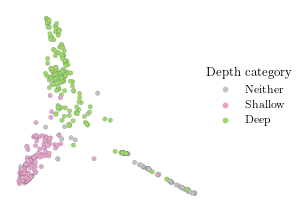

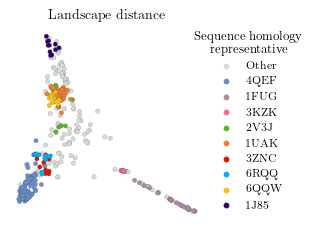

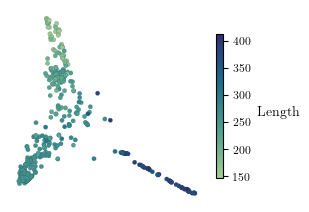

In [35]:
generate_isomap_figs("landscape", title="Landscape distance")

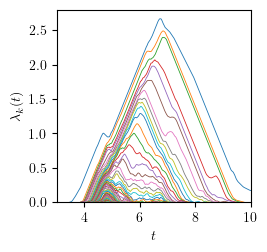

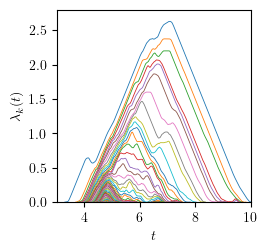

In [40]:
cluster_3znc = trefoil_df[trefoil_df.Representative == '3ZNC'].Chain
cluster_6rqq = trefoil_df[trefoil_df.Representative == '6RQQ'].Chain

xlim = [3,10]
ylim = [0,2.8]

avg_3znc = landscapes.average([load_landscape(chain) for chain in cluster_3znc])
avg_6rqq = landscapes.average([load_landscape(chain) for chain in cluster_6rqq])

fig, ax = plot_landscape(avg_3znc, xlim, ylim, linewidths=[0.6]*avg_3znc.max_k())
fig.savefig("figures/average-3znc.pdf",bbox_inches="tight", transparent=True)
fig.savefig("figures/average-3znc.png", dpi=300, bbox_inches="tight", transparent=True)



fig, ax = plot_landscape(avg_6rqq, xlim, ylim, linewidths=[0.6]*avg_6rqq.max_k())
fig.savefig("figures/average-6rqq.pdf",bbox_inches="tight", transparent=True)
fig.savefig("figures/average-6rqq.png", dpi=300, bbox_inches="tight", transparent=True)

# Section 4

In [16]:
from IPython.display import clear_output



def weighted_distance(landscape1, landscape2, p, weights):
    diff = landscapes.linear_combination([landscape1, landscape2], [1,-1])
    return landscapes.weighted_integral(diff, weights + [0]*diff.max_k())

def weighted_distance_matrix(landscapes, p, weights, verbose = False):
    N = len(landscapes)
    matrix = np.zeros((N,N))
    for i in range(N):
        if verbose:
            print("row", i)
            clear_output(wait=True)
        for j in range(i):
            d = weighted_distance(landscapes[i], landscapes[j], p, weights)
            matrix[i,j] = d
            matrix[j,i] = d
    clear_output()
    return matrix

In [17]:
def load_eirene_landscape(chain):
    return landscapes.load("./data/representatives/landscapes/{}.lan".format(chain))

otcase_df = pd.read_csv("aotcase-otcase.csv")

knotted_landscapes = [load_eirene_landscape(chain) for chain in otcase_df[otcase_df.Type == 'knotted'].Chain]
unknotted_landscapes = [load_eirene_landscape(chain) for chain in otcase_df[otcase_df.Type == 'unknotted'].Chain]

In [18]:
dm = weighted_distance_matrix(knotted_landscapes + unknotted_landscapes, 1, [0,1], True)

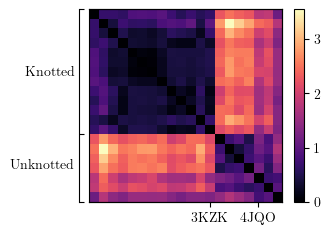

In [19]:
fig, ax = plt.subplots(figsize=(3.12,2.5))

pos = ax.imshow(dm, cmap='magma')

fig.colorbar(pos)

ax.set_xticks([12,17])
ax.set_xticklabels(['3KZK', '4JQO'])
ax.set_yticks([])

ax2 = ax.twinx()

ax2.spines["left"].set_position(("axes", -0.05))
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.tick_params('both', direction='in', which='major')
ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")

ax2.set_yticks([0.0, 0.354, 1.0])
ax2.yaxis.set_major_formatter(ticker.NullFormatter())
ax2.yaxis.set_minor_locator(ticker.FixedLocator([0.2, 0.68]))
ax2.yaxis.set_minor_formatter(ticker.FixedFormatter(['Unknotted', 'Knotted']))


fig.savefig('./figures/otcase-heatmap.pdf', bbox_inches='tight', transparent=True)

In [20]:
knotted_avg = landscapes.average(knotted_landscapes)
unknotted_avg = landscapes.average(unknotted_landscapes)

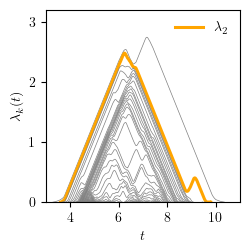

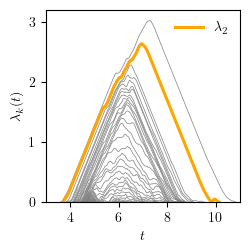

In [42]:
fig,ax = plot_landscape(knotted_avg, xlim=[3,11], ylim=[0,3.2],
                        colors=['gray', 'orange'] + ['gray']*knotted_avg.max_k(),
                        linewidths=[0.5, 2.2]+[0.5]*knotted_avg.max_k(),
                        labels=['_nolegend_', '$\lambda_2$'] + ['_nolegend_']*knotted_avg.max_k())
plt.legend(prop={'size': 10}, frameon=False)
plt.show()
fig.savefig("figures/knotted-avg.pdf",bbox_inches="tight", transparent=True)
fig.savefig("figures/knotted-avg.png",dpi=300,bbox_inches="tight", transparent=True)



fig,ax = plot_landscape(unknotted_avg, xlim=[3,11], ylim=[0,3.2],
                        colors=['gray', 'orange'] + ['gray']*unknotted_avg.max_k(),
                        linewidths=[0.5, 2.2]+[0.5]*unknotted_avg.max_k(),
                        labels=['_nolegend_', '$\lambda_2$'] + ['_nolegend_']*unknotted_avg.max_k())
plt.legend(prop={'size': 10}, frameon=False)

fig.savefig("figures/unknotted-avg.pdf",bbox_inches="tight", transparent=True)
fig.savefig("figures/unknotted-avg.png", dpi=300, bbox_inches="tight", transparent=True)


plt.show()